# ML Dataset Preprocessing

This notebook is to explain/complete data preprocessing for the dataset created/cleaned in the previous notebook. The end result will be a dataset with data that can be used for training/testing a machine learning model for photometric redshift prediction.

In this notebook:
1. The Dataset created in the previous file will be loaded.
2. The data will be explored to justify the processing.
3. The data will then be used to create new features suitable for machine learning.


# Part 1
## Loading the relevant modules and Dataset

In [1]:
#import modules
#data handling/preprocessing
import pandas as pd
import numpy as np
from sklearn import preprocessing
#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#loading the dataset
df = pd.read_csv("/home/richard/Work/placement_project/CNGFPPR/data/TEDDY_SDSS_PS1_2MASS_all_data")

# Part 2
## Feature Creation and Exploring the Data

Features to Create:
- Colour Features

Features to Explore:
- The colour or filter magnitudes (Soon to be training data)
- Redshift Distribution (Target Variable)

Need to Know:
- How distirbution is shaped
    - This tells if normalisation is needed for training data
    - Count vs. Target Variable (a histogram) will show if the dataset is unbalanced

Solutions:
- Normalise and center data
- Undersampling/oversampling to balance data

In [17]:
df.columns

Index(['SDSSID', 'SDSSRa', 'SDSSDec', 'z', 'ZErr', 'SDSS_uMag', 'SDSS_gMag',
       'SDSS_rMag', 'SDSS_iMag', 'SDSS_zMag', 'SDSS_uMagErr', 'SDSS_gMagErr',
       'SDSS_rMagErr', 'SDSS_iMagErr', 'SDSS_zMagErr', 'PS1ID', 'PS1AngSep',
       'PS1Ra', 'PS1Dec', 'gKronMag', 'rKronMag', 'iKronMag', 'zKronMag',
       'yKronMag', 'gKronMagErr', 'rKronMagErr', 'iKronMagErr', 'zKronMagErr',
       'yKronMagErr', 'TMassID', 'TMassAngSep', 'TMassRa', 'TMassDec', 'j_m',
       'h_m', 'k_m', 'j_err', 'h_err', 'k_err', 'TMASSID'],
      dtype='object')

### Creating Features

In [42]:
def rename(df):
    #renaming for convenience
    renamed = {"gKronMag":"gMag","rKronMag":"rMag","iKronMag":"iMag",
               "zKronMag":"zMag","yKronMag":"yMag","j_m":"jMag",
               "h_m":"hMag","k_m":"kMag"}
    df = df.rename(columns=renamed)
    return df

def reomve_nan(df):
    df = df.replace(-999, np.nan)
    return df

def colour_feature_creation(df):
    #creating colour features
    #sdss
    df["ug_SDSS"] = df.SDSS_uMag - df.SDSS_gMag
    df["gr_SDSS"] = df.SDSS_gMag - df.SDSS_rMag
    df["ri_SDSS"] = df.SDSS_rMag - df.SDSS_iMag
    df["iz_SDSS"] = df.SDSS_iMag - df.SDSS_zMag
    #panstarrs
    df["ug"] = df.SDSS_uMag - df.gMag
    df["gr_PS"] = df.gMag - df.rMag
    df["ri_PS"] = df.rMag - df.iMag
    df["iz_PS"] = df.iMag - df.zMag
    df["zy_PS"] = df.zMag - df.yMag
    #twomass
    df["yj"] = df.yMag - df.jMag
    df["jh"] = df.jMag - df.hMag
    df["hk"] = df.hMag - df.kMag
    return df


def colour_error_feature_creation(df):
    df["ugErr"] = np.sqrt((df.SDSS_uMagErr)**2 + (df.gKronMagErr)**2)
    df["grErr"] = np.sqrt((df.gKronMagErr)**2 + (df.rKronMagErr)**2)
    df["riErr"] = np.sqrt((df.rKronMagErr)**2 + (df.iKronMagErr)**2)
    df["izErr"] = np.sqrt((df.iKronMagErr)**2 + (df.zKronMagErr)**2)
    df["zyErr"] = np.sqrt((df.zKronMagErr)**2 + (df.yKronMagErr)**2)
    df["yjErr"] = np.sqrt((df.yKronMagErr)**2 + (df.j_err)**2)
    df["jhErr"] = np.sqrt((df.j_err)**2 + (df.h_err)**2)
    df["hkErr"] = np.sqrt((df.h_err)**2 + (df.k_err)**2)
    return df

In [43]:
#running the alterations
df = df.pipe(rename)

df = df.pipe(reomve_nan)

df = (df.pipe(colour_feature_creation)
        .pipe(colour_error_feature_creation))

In [45]:
df

,SDSSID,SDSSRa,SDSSDec,z,ZErr,SDSS_uMag,SDSS_gMag,SDSS_rMag,SDSS_iMag,SDSS_zMag,...,jh,hk,ugErr,grErr,riErr,izErr,zyErr,yjErr,jhErr,hkErr
0,1237662266470237911,243.270350,2.994859,0.663874,0.000198,25.56275,22.83073,21.16518,19.93503,19.63537,...,NaN,NaN,NaN,NaN,0.065452,0.041225,0.070177,NaN,NaN,NaN
1,1237657118941577636,117.277250,29.305172,0.102362,0.000030,20.32887,18.52176,17.60047,17.18418,16.86134,...,0.099000,-0.350000,0.078732,0.007568,0.004978,0.008680,0.012988,0.077686,0.121511,0.187297
2,1237661948655239429,211.272440,10.315721,0.264092,0.000052,20.69785,18.86280,17.34143,16.78700,16.45400,...,0.169000,0.323999,0.168109,0.017999,0.006262,0.007621,0.012137,0.090591,0.144461,0.161941
3,1237666273661223281,11.693089,23.767029,0.252819,0.000038,21.38727,19.30797,17.74030,17.18118,16.83034,...,0.069000,0.500000,0.207494,0.016044,0.007943,0.010170,0.014909,0.118654,0.180812,0.191638
4,1237662194523767536,176.462600,42.065285,0.563699,0.000125,25.57828,22.87555,20.86299,19.83455,19.18073,...,NaN,NaN,0.972581,0.177450,0.046746,0.041254,0.082710,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314320,1237680530276221391,341.056300,28.193643,0.153329,0.000041,23.41499,22.85378,20.91858,19.91021,19.70342,...,NaN,NaN,0.560236,0.014197,0.010564,0.013438,0.022762,NaN,NaN,NaN
314321,1237678617420104410,5.250210,1.258280,0.404736,0.000058,22.13469,21.05278,19.77937,19.28931,18.89218,...,NaN,NaN,0.284612,0.045655,0.021202,0.029576,0.043092,NaN,NaN,NaN
314322,1237663479792664912,326.464230,0.514423,0.300415,0.000028,22.98600,21.38283,19.98292,19.15430,18.69812,...,-0.110000,0.020000,0.675943,0.005319,0.003623,0.005878,0.014870,0.109873,0.241052,0.288252
314323,1237680331095409047,339.872290,26.425648,0.070198,0.000007,20.06830,20.69494,20.22596,19.08978,19.99387,...,0.250000,-0.106000,0.088793,0.005641,0.004286,0.006683,0.012064,0.088629,0.129495,0.132944


In [31]:
df.columns

Index(['SDSSID', 'SDSSRa', 'SDSSDec', 'z', 'ZErr', 'SDSS_uMag', 'SDSS_gMag',
       'SDSS_rMag', 'SDSS_iMag', 'SDSS_zMag', 'SDSS_uMagErr', 'SDSS_gMagErr',
       'SDSS_rMagErr', 'SDSS_iMagErr', 'SDSS_zMagErr', 'PS1ID', 'PS1AngSep',
       'PS1Ra', 'PS1Dec', 'gMag', 'rMag', 'iMag', 'zMag', 'yMag',
       'gKronMagErr', 'rKronMagErr', 'iKronMagErr', 'zKronMagErr',
       'yKronMagErr', 'TMassID', 'TMassAngSep', 'TMassRa', 'TMassDec', 'jMag',
       'hMag', 'kMag', 'j_err', 'h_err', 'k_err', 'TMASSID', 'ug_SDSS',
       'gr_SDSS', 'ri_SDSS', 'iz_SDSS', 'ug', 'gr_PS', 'ri_PS', 'iz_PS',
       'zy_PS', 'yj', 'jh', 'hk', 'ugErr', 'grErr', 'riErr', 'izErr', 'zyErr',
       'yjErr', 'jhErr', 'hkErr'],
      dtype='object')

### Exploring Features
- Colours
- Magnitudes
- Errors

- Target Variable (Z mag)

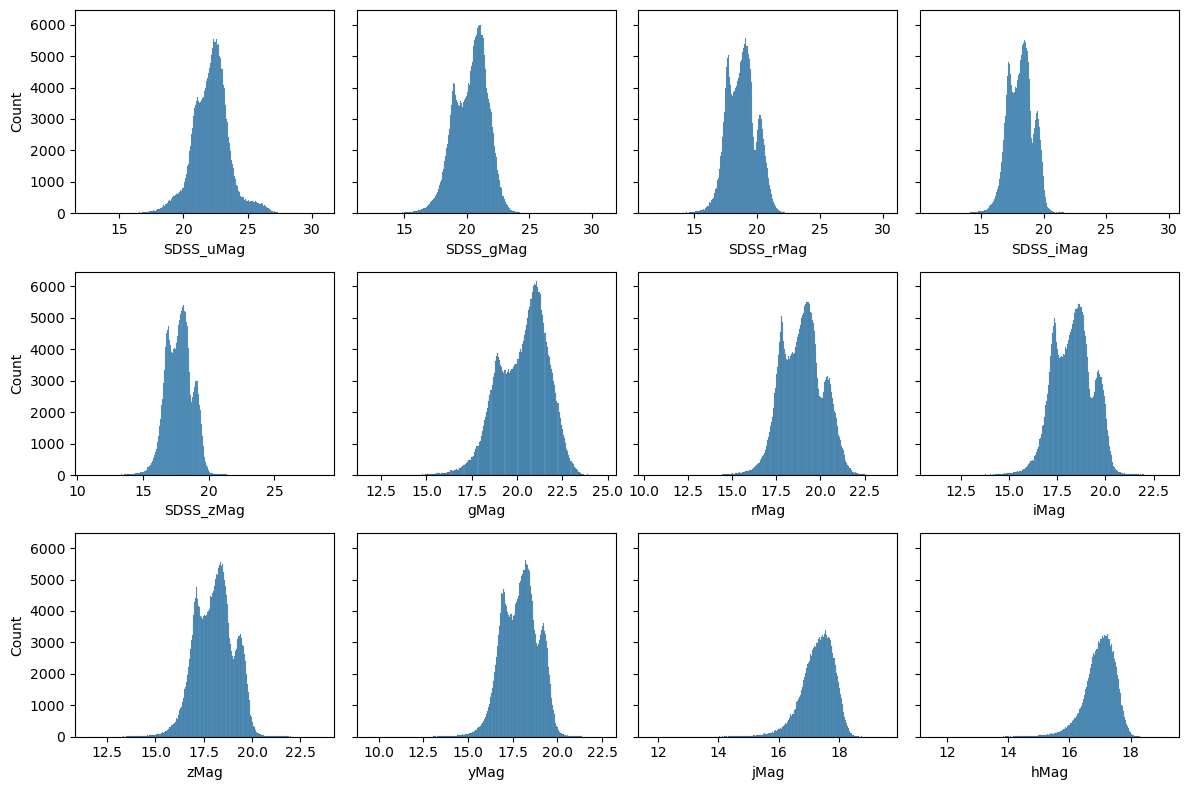

In [49]:
#plotting magnitudes features to look at their dists
fig, axs = plt.subplots(3,4, figsize=[12, 8], sharey=True)

sns.histplot(df.SDSS_uMag, ax = axs[0,0])
sns.histplot(df.SDSS_gMag, ax = axs[0,1])
sns.histplot(df.SDSS_rMag, ax = axs[0,2])
sns.histplot(df.SDSS_iMag, ax = axs[0,3])
sns.histplot(df.SDSS_zMag, ax = axs[1,0])
sns.histplot(df.gMag, ax = axs[1,1])
sns.histplot(df.rMag, ax = axs[1,2])
sns.histplot(df.iMag, ax = axs[1,3])
sns.histplot(df.zMag, ax = axs[2,0])
sns.histplot(df.yMag, ax = axs[2,1])
sns.histplot(df.jMag, ax = axs[2,2])
sns.histplot(df.hMag, ax = axs[2,3])
# sns.histplot(df.kMag, ax = axs[,0))

plt.tight_layout()
plt.show()

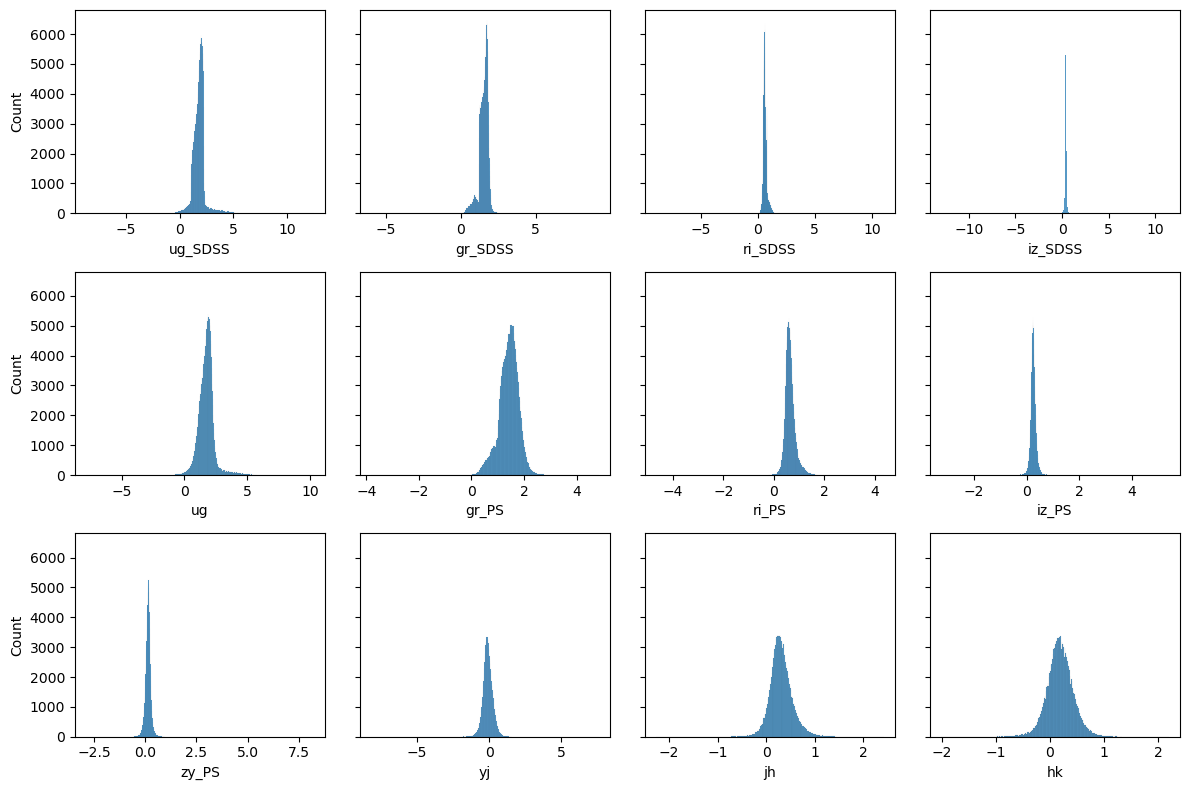

In [50]:
#plotting magnitudes features to look at their dists
fig, axs = plt.subplots(3,4, figsize=[12, 8], sharey=True)

sns.histplot(df.ug_SDSS, ax = axs[0,0])
sns.histplot(df.gr_SDSS, ax = axs[0,1])
sns.histplot(df.ri_SDSS, ax = axs[0,2])
sns.histplot(df.iz_SDSS, ax = axs[0,3])
sns.histplot(df.ug, ax = axs[1,0])
sns.histplot(df.gr_PS, ax = axs[1,1])
sns.histplot(df.ri_PS, ax = axs[1,2])
sns.histplot(df.iz_PS, ax = axs[1,3])
sns.histplot(df.zy_PS, ax = axs[2,0])
sns.histplot(df.yj, ax = axs[2,1])
sns.histplot(df.jh, ax = axs[2,2])
sns.histplot(df.hk, ax = axs[2,3])

plt.tight_layout()
plt.show()

Since a Gradient Boosted Regression Tree is being used in this application, the data may not need to be normalised since they generally acn deal with non-normalised data. This is because they split data into bins based on a threshold which depends only on the order of data i.e. a split at 0.35 for data ranging between 0 and 1 is the same as a split at 3.5 for data between 1 and 10.

### Looking at the distribution of the target variable

The distribution of our target variable should be representative of the data we feed our machine learning model. The data we give our machine learning model will be real world data collected by telescopes more specifically those of PanSTARRS or 2MASS. This data is likely to be less complete compared to the Teddy Dataset as this data was tailored to be complete and have a wide range of redshifts not necessarily similar to the data seen from PanSTARRS given the limitations of telescopes.

For this reason we expect roughly to see:
1) A general increase in redshifts with respect to distance cubed (as we are viewing all space around us)
2) A decrease in detections and eventually very little to no detections due to the detection limit of panstarrs/ our model

The decrease in detections should occur around rmagnitude of 20 which is around z=0.1. 20th Magnitude in the r band is chosen as this is a limit imposed as a rule for the data processing pipeline.

In [64]:
#looking at an example from the MGC catalogue which is a survey of nearby galaxies with redshift information
# download mgc zcat here: https://hsweb.hs.uni-hamburg.de/projects/observational-astronomy/mgc/

mgc_zcat = pd.read_csv("/home/richard/Work/placement_project/CNGFPPR/data/mgc_zcat.txt",
            delim_whitespace=True,
            names=["ID", "MGCFN", "ALPHA_J2000", "DELTA_J2000", "QUALITY", "CLASS", "INEXR",
                   "SDSS_OBJID", "SDSS_PSFMAG_G", "SDSS_PSFMAG_R", "SDSS_PSFMAG_I", "SDSS_PSFMAG_Z",
                   "SDSS_PETMAG_G", "SDSS_PETMAG_R", "SDSS_PETMAG_I", "SDSS_PETMAG_Z",
                   "BEST_Z", "BEST_ZQUAL"],
            usecols=[0, 1, 5, 6, 16, 18, 19, 21, 29, 30, 31, 32, 34, 35, 36, 37, 121, 122],
            on_bad_lines="skip")

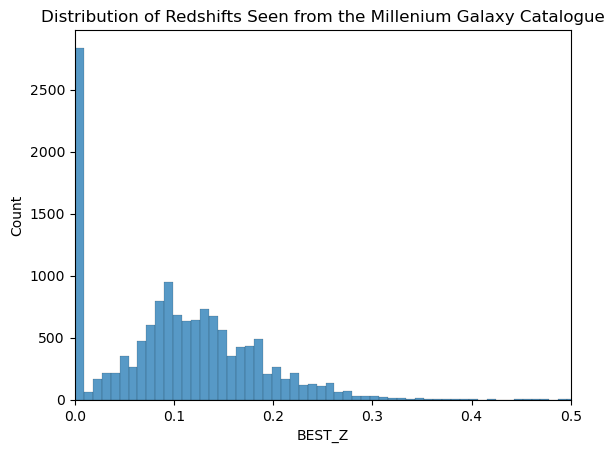

In [75]:
fig, ax = plt.subplots()

query = "BEST_Z < 8 & BEST_Z > 0"

sns.histplot(mgc_zcat.query(query).BEST_Z)
ax.set_xlim(0, 0.5)

plt.title("Distribution of Redshifts Seen from the Millenium Galaxy Catalogue")
plt.show()

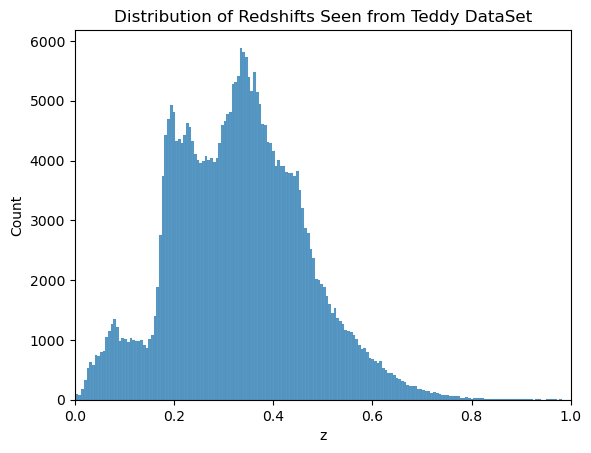

In [76]:
fig, ax = plt.subplots()

sns.histplot(df.z)
ax.set_xlim(0, 1)

plt.title("Distribution of Redshifts Seen from Teddy DataSet")
plt.show()